In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
from sklearn.datasets import load_digits

digits=load_digits()

In [3]:
dir(digits)
digits.images[0]
digits.data[0]

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

```python
matplotlib.pyplot.matshow(A, fignum=None, **kwargs)
```

<li>Display an array as a matrix in a new figure window.</li>

<li> A: 2D array-like. The matrix to be displayed.</li>


<Figure size 720x480 with 0 Axes>

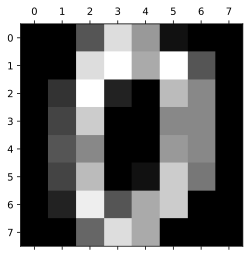

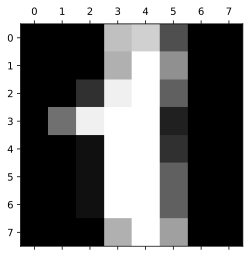

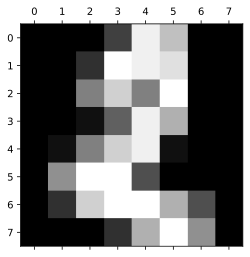

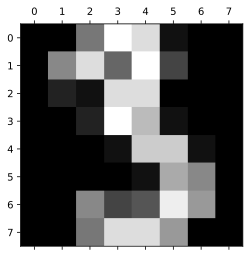

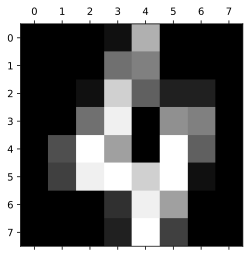

In [4]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
# create and train logistic regression model
lr=LogisticRegression(solver='lbfgs', max_iter=3000)


In [6]:
X=digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
y=digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [10]:
lr.fit(X_train, y_train).__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 3000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 64,
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'n_iter_': array([2290]),
 'coef_': array([[ 0.00000000e+00,  1.34941274e-03, -7.12266864e-03,
         -3.65038092e-02,  1.31536185e-02, -1.25190866e-01,
         -1.03206953e-01, -1.77081361e-02, -1.97352915e-05,
         -2.64619240e-02, -4.19766749e-02,  1.78000819e-01,
          2.54755018e-02,  4.85257545e-02, -3.94911518e-02,
         -1.82427599e-02, -3.63252631e-03,  8.58467176e-04,
          6.51717762e-02, -9.07417727e-04, -3.26427683e-01,
          1.59769515e-01,  3.64597177e-02, -4.70226164e-03,
         -1.81632923e-03,  7.65210394e-02,  9.10772337e-02,
         -1.21841384e-01, -4.29004717e-01,  1.26853065e-0

In [11]:
lr.score(X_test, y_test)

0.975

In [12]:
predicted=lr.predict(X_test)

In [13]:
# Confusion matrix

cm=confusion_matrix(predicted, y_test)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 31]], dtype=int64)

<Figure size 1200x840 with 0 Axes>

<AxesSubplot:>

Text(0.5, 71.66666666666666, 'Truth')

Text(116.66666666666667, 0.5, 'Predicted')

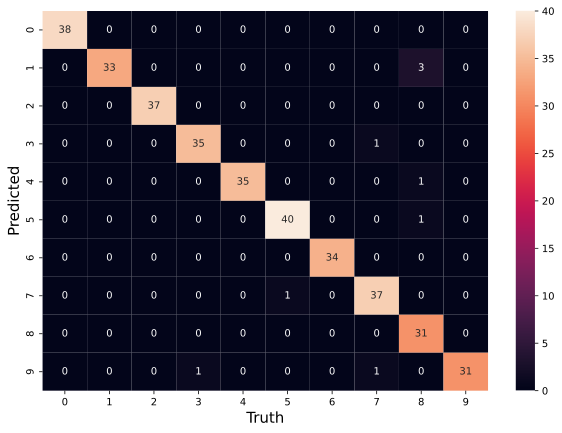

In [14]:
plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, xticklabels=1, yticklabels=1, cmap=None,cbar=True)

plt.xlabel('Truth', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

### Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

- Sepal Length
- Sepal Width
- Petal Length
- Petal Width <br>
Using above 4 features you will classify a flower in one of the three categories,

- Setosa
- Versicolour
- Virginica

In [15]:
from sklearn.datasets import load_iris

iris=load_iris()

In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris.target
iris.target_names
iris.feature_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


In [20]:
df['flower']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,2
146,6.30,2.50,5.00,1.90,2
147,6.50,3.00,5.20,2.00,2
148,6.20,3.40,5.40,2.30,2


In [21]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower                 int32
dtype: object

In [22]:
df['flower']=df['flower'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica


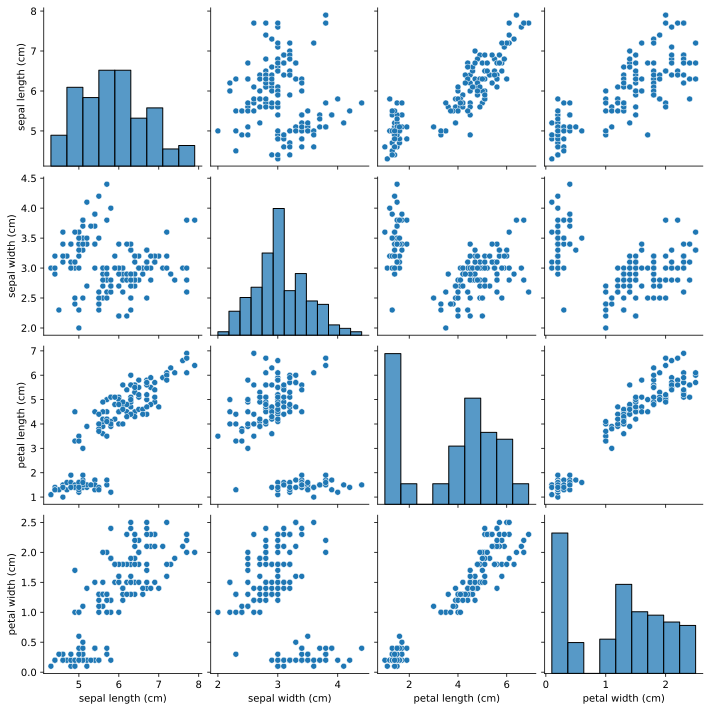

In [23]:
sns.pairplot(df)

<Figure size 1440x720 with 0 Axes>

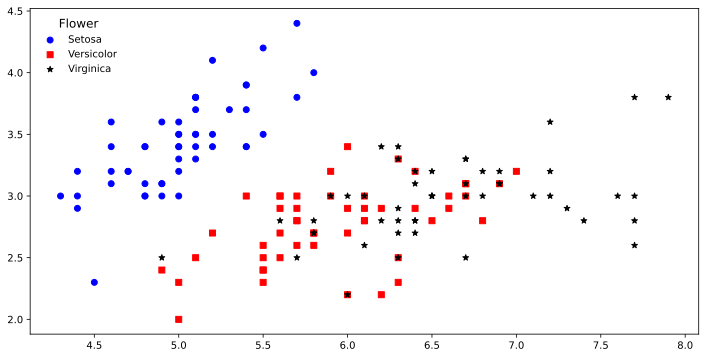

In [43]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['flower']=='setosa']['sepal length (cm)'], 
            df[df['flower']=='setosa']['sepal width (cm)'], 
            c='blue', marker='o', label='Setosa')

plt.scatter(df[df['flower']=='versicolor']['sepal length (cm)'], 
            df[df['flower']=='versicolor']['sepal width (cm)'], 
            c='red', marker='s', label='Versicolor')

plt.scatter(df[df['flower']=='virginica']['sepal length (cm)'], 
            df[df['flower']=='virginica']['sepal width (cm)'], 
            c='black', marker='*', label='Virginica')

leg=plt.legend(loc='upper left', frameon=False, labelspacing=0.5, borderpad=0.5)
leg.set_title('Flower', prop={'size':12})

In [44]:
X=iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
predicted=lr.predict(X_test)
predicted

array([0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 0, 1, 1])

In [50]:
lr.score(X_test, y_test)

0.9666666666666667

In [52]:
cm=confusion_matrix(predicted, y_test)
cm

array([[15,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  7]], dtype=int64)

<Figure size 1440x720 with 0 Axes>

Text(146.66666666666669, 0.5, 'Predicted')

Text(0.5, 56.666666666666664, 'Truth')

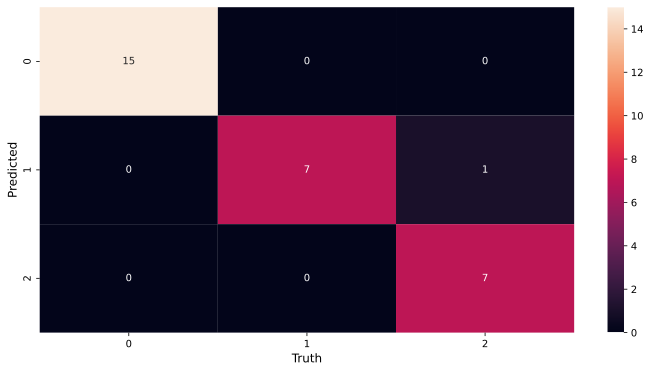

In [57]:
plt.figure(figsize=(12, 6))

c_m=sns.heatmap(cm, annot=True)

c_m.set_ylabel('Predicted', fontsize=12)
c_m.set_xlabel('Truth', fontsize=12)